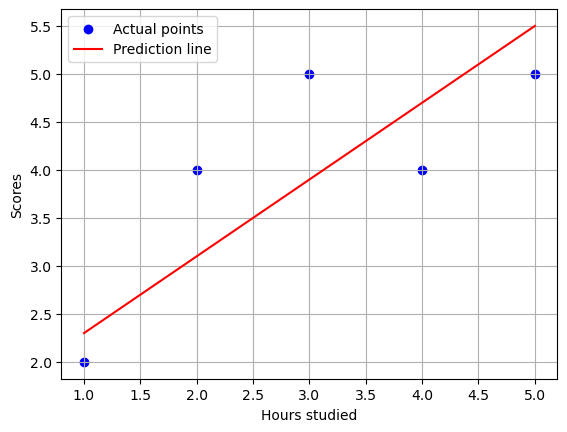

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x = np.array([1, 2, 3, 4, 5])        # Hours studied
y = np.array([2, 4, 5, 4, 5])        # Scores

# Assume slope (m) = 0.8 and intercept (b) = 1.5
m, b = 0.8, 1.5
y_pred = m * x + b

# Plot
plt.scatter(x, y, color='blue', label='Actual points')
plt.plot(x, y_pred, color='red', label='Prediction line')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.grid()
plt.legend()
plt.show()


In [4]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Example
y_pred = m * x + b
mse = mean_squared_error(y, y_pred)
print("MSE:", mse)


MSE: 0.5699999999999998


In [ ]:
import numpy as np

# Data
x = np.array([1, 2, 3, 4, 5])        # hours studied
y = np.array([2, 4, 5, 4, 5])        # actual scores

# Initialize parameters
m = 0
b = 0
learning_rate = 0.01
epochs = 1000  # number of times we'll adjust

n = len(x)

# Gradient Descent Loop
for _ in range(epochs):
    y_pred = m * x + b
    # calculate gradients
    dm = (-2/n) * np.sum(x * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    # update parameters
    m -= learning_rate * dm
    b -= learning_rate * db

print(f"m (slope): {m:.2f}")
print(f"b (intercept): {b:.2f}")

# Predictions after training
predicted = m * x + b
print("Predicted scores:", predicted)


m (slope): -3644828308673702332209896597382801138358202380872757441989347324471575322070298105068411635725599589052410483746738184593387255005970432.00
b (intercept): -1009558996492735174571994914240790546982198218350082592353274347783124888898843775304278027968712618886396035571322579465817831633846272.00
Predicted scores: [-4.65438731e+135 -8.29921561e+135 -1.19440439e+136 -1.55888722e+136
 -1.92337005e+136]
